In [ ]:
### predictive modeling techniques for IT decision making across firm sizes  


In [7]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns





from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# II-Access Dataset 📊📊

In [9]:
# II- loading dataset 

df = pd.read_csv('HR-Employee-Attrition.csv', skiprows=0) #IBM dataset (Large firm)

#display dataset
df.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [10]:
# DATASET ORIGINAL INFO


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
#get part desc
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EDA

In [12]:
# Check for null values
null_counts = df.isnull().sum()
print("Null values/ column:\n", null_counts)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}") 


Null values/ column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole

In [13]:
#number of unique values

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("*******************")

Age: Number of unique values 43
*******************
Attrition: Number of unique values 2
*******************
BusinessTravel: Number of unique values 3
*******************
DailyRate: Number of unique values 886
*******************
Department: Number of unique values 3
*******************
DistanceFromHome: Number of unique values 29
*******************
Education: Number of unique values 5
*******************
EducationField: Number of unique values 6
*******************
EmployeeCount: Number of unique values 1
*******************
EmployeeNumber: Number of unique values 1470
*******************
EnvironmentSatisfaction: Number of unique values 4
*******************
Gender: Number of unique values 2
*******************
HourlyRate: Number of unique values 71
*******************
JobInvolvement: Number of unique values 4
*******************
JobLevel: Number of unique values 5
*******************
JobRole: Number of unique values 9
*******************
JobSatisfaction: Number of unique values 4
**

Check for Outliers

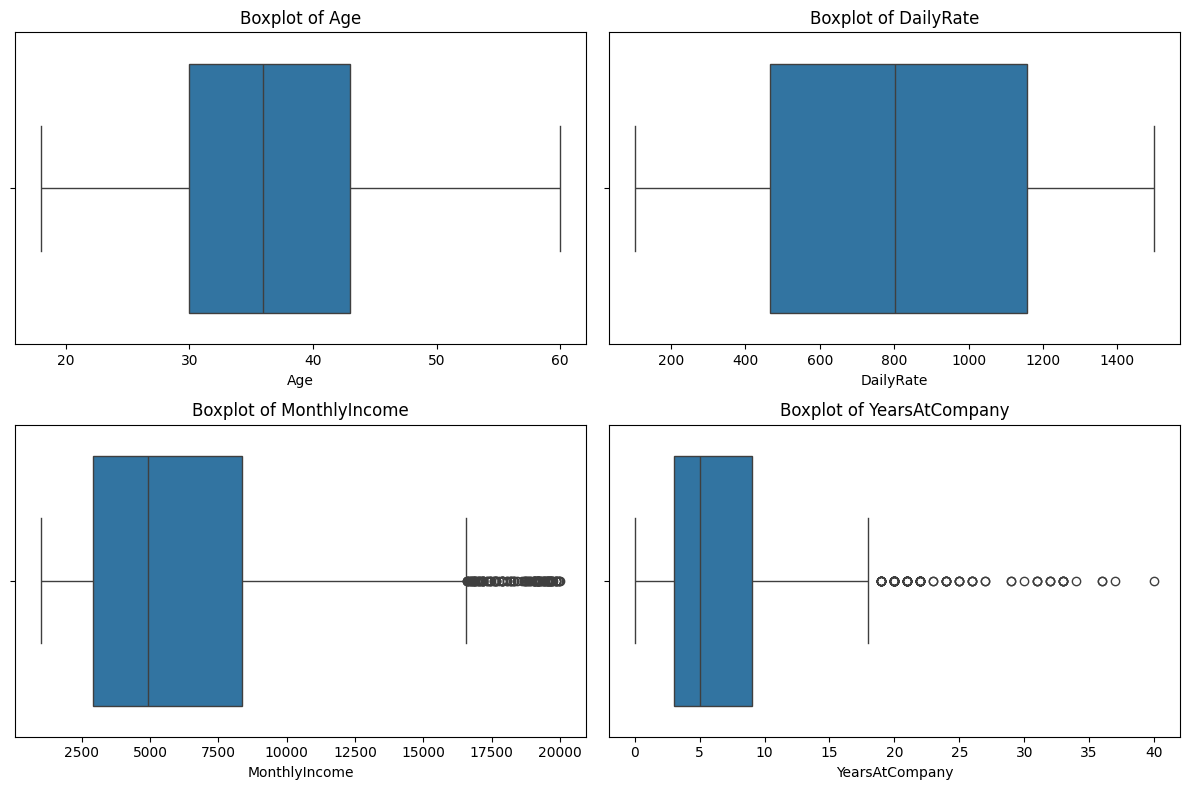

In [14]:
#highlight extreme values beyond (potential outliers).


import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age','DailyRate','MonthlyIncome','YearsAtCompany']
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


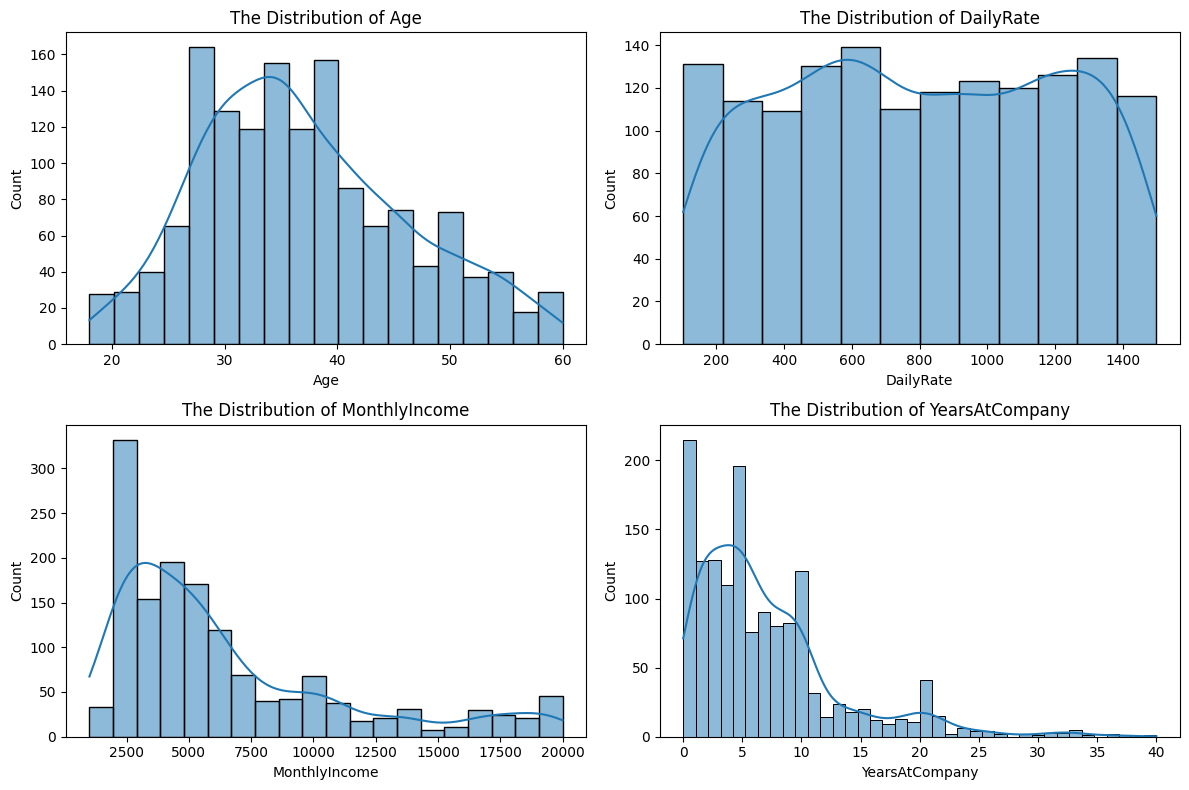

In [15]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'The Distribution of {col}')
plt.tight_layout()
plt.show()


Correlation Analysis

In [16]:
# Select numeric columns 
numeric_df = df.select_dtypes(include=['int64','float64'])

In [17]:
corr_matrix = numeric_df.corr()


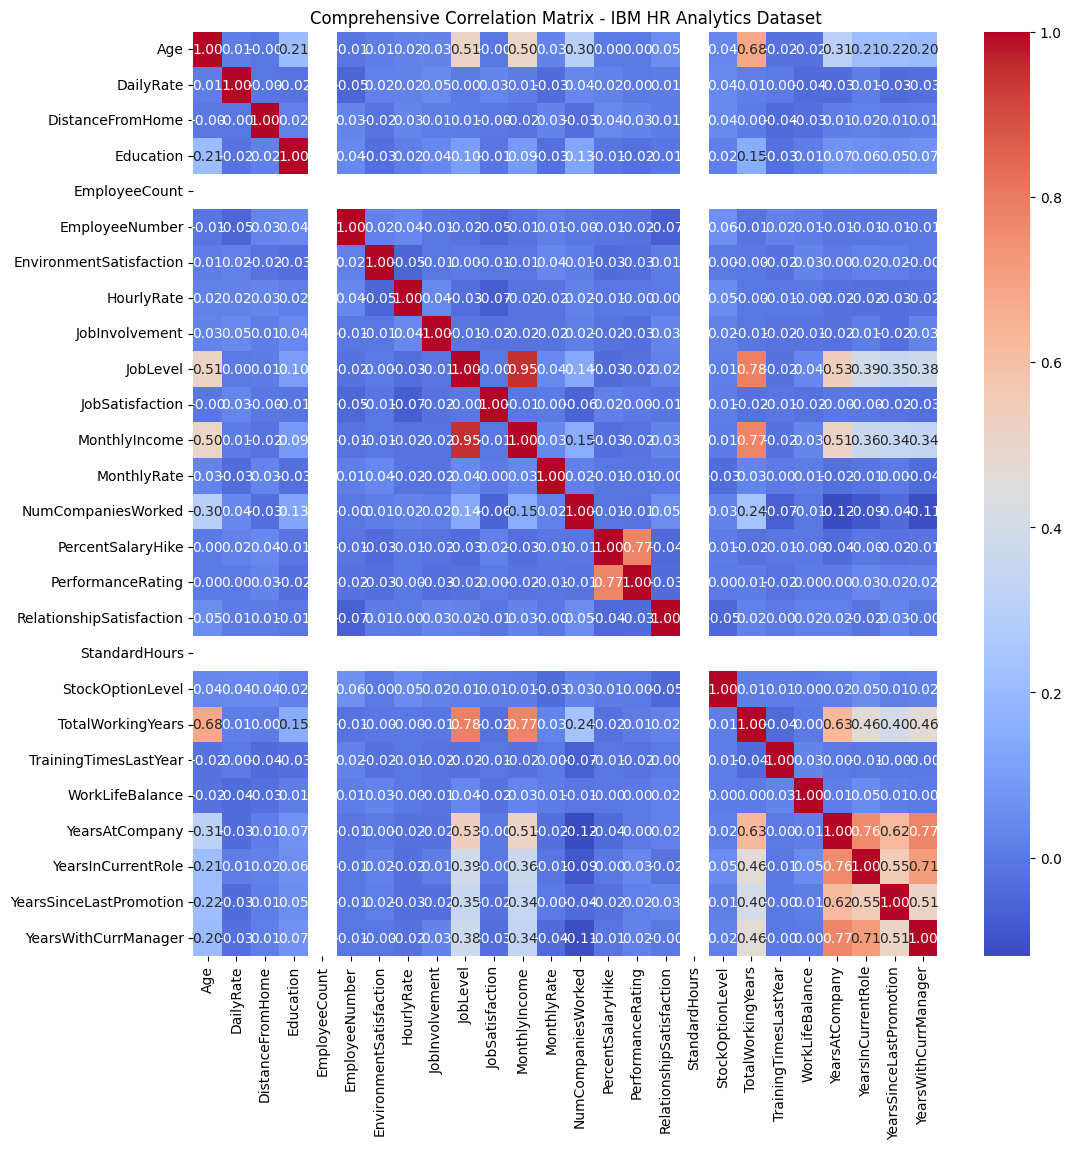

In [18]:
#heatmap

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Comprehensive Correlation Matrix - IBM HR Analytics Dataset')
plt.show()



data preprocessing

In [19]:
# Preprocessing: Encode only Attrition column (Yes/No → 1/0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


processed_df = df.copy()

# Display structure of the processed dataframe
processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
# Display original and processed dataset shapes

print("Processed dataset shape (before cleaning):", processed_df.shape)

#  Remove duplicate features 

cleaned_df = processed_df.T.drop_duplicates().T

#  Remove duplicate rows (records)
cleaned_df.drop_duplicates(inplace=True)

# Display final dataset shape
print("After removing duplicates:", cleaned_df.shape)


Processed dataset shape (before cleaning): (1470, 35)
After removing duplicates: (1470, 35)


correlation 

In [31]:
# Create binary target variable for Attrition
df['EncodedAttrition'] = (df['Attrition'] == 'Yes').astype(int)


print(df[['Attrition', 'EncodedAttrition']].head(10))

# Optional: verify distribution
print(df['EncodedAttrition'].value_counts())


   Attrition  EncodedAttrition
0          1                 0
1          0                 0
2          1                 0
3          0                 0
4          0                 0
5          0                 0
6          0                 0
7          0                 0
8          0                 0
9          0                 0
EncodedAttrition
0    1470
Name: count, dtype: int64



# Compute correlation 
fcorrelation = (
    cleaned_df.drop('Attrition', axis=1)
              .corrwith(cleaned_df['Attrition'])
              .sort_values(ascending=False)
)

# Select features 
selected_features = fcorrelation[np.abs(fcorrelation) > 0.02].index.tolist()

# Display results
print("Selected Features:", selected_features)
print("Number of Features:", len(selected_features))


## III TRAINING 🤖

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [ ]:
#features selection

 
# encoded Target variable
#y = df['EncodedAttrition'] 
y = df['Attrition']
X = df[['Age', 'DistanceFromHome', 'JobSatisfaction', 'TotalWorkingYears']] # X features



In [37]:

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [38]:


# --- Logistic Regression ---
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # scale features
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred_log = log_reg_pipeline.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1:", f1_score(y_test, y_pred_log))
print("AUC:", roc_auc_score(y_test, y_pred_log))

# --- Random Forest ---
rf_model = RandomForestClassifier(
    n_estimators=200, max_depth=6, random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_pred_rf))

# --- Random Forest Pipeline ---
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # optional scaling
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42))
])

rf_pipeline.fit(X_train, y_train)


Logistic Regression Results:
Accuracy: 0.8401360544217688
Precision: 0.0
Recall: 0.0
F1: 0.0
AUC: 0.5


c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



Random Forest Results:
Accuracy: 0.8197278911564626
Precision: 0.2857142857142857
Recall: 0.0851063829787234
F1: 0.13114754098360656
AUC: 0.5223102765096045


,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2


In [39]:
import pandas as pd

# Define metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# Results from your models
log_reg_results = [0.8401, 0.0, 0.0, 0.0, 0.5]
rf_results = [0.8197, 0.2857, 0.0851, 0.1311, 0.5223]

# Create DataFrame
results_table = pd.DataFrame({
    'Metric': metrics, 
    'Logistic Regression': log_reg_results,
    'Random Forest': rf_results
})

# Display table
print(results_table.to_string(index=False))


   Metric  Logistic Regression  Random Forest
 Accuracy               0.8401         0.8197
Precision               0.0000         0.2857
   Recall               0.0000         0.0851
 F1 Score               0.0000         0.1311
      AUC               0.5000         0.5223


## III.1 PREDICTIVE MODELS

PERFORMANCE EVALUATION OF MODELS 📈📈

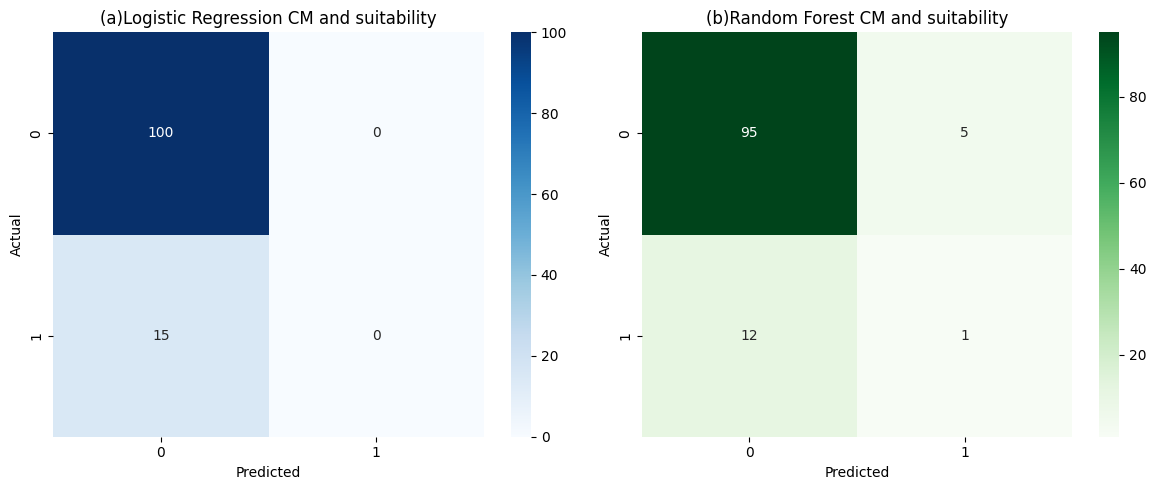

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Confusion Matrices ---
# Logistic Regression model performances
conf_matrix_lr = np.array([[100, 0],
                           [15, 0]])

# Random Forest model performances (Precision ~0.29, Recall ~0.085)
conf_matrix_rf = np.array([[95, 5],
                           [12, 1]])

# Plot confusion matrices (CM)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('(a)Logistic Regression CM and suitability')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('(b)Random Forest CM and suitability')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


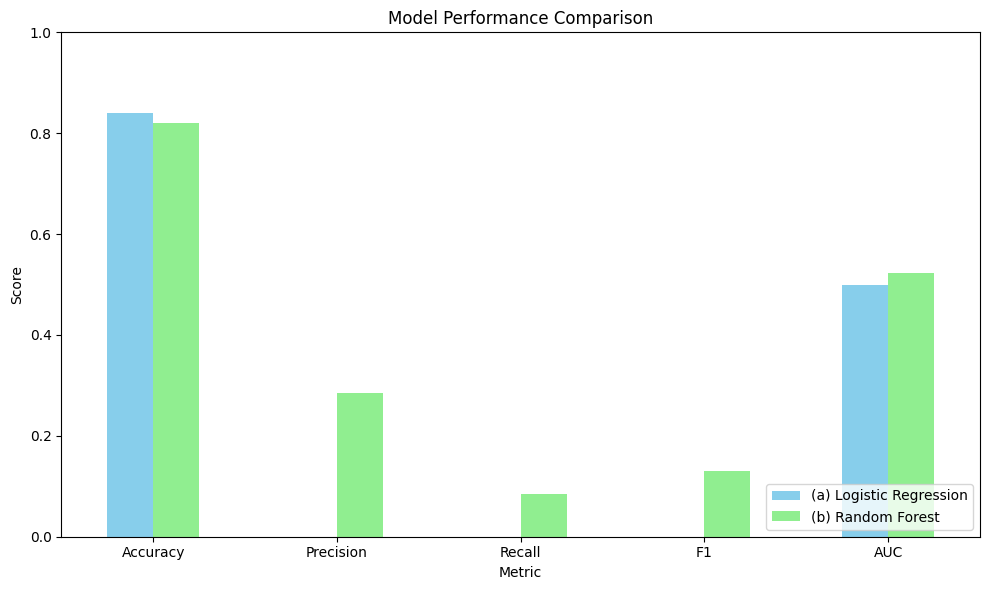

In [41]:

# --- Bar Chart Comparing Metrics ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
lr_scores = [0.8401, 0.0, 0.0, 0.0, 0.5]
rf_scores = [0.8197, 0.2857, 0.0851, 0.1311, 0.5223]

df_metrics = pd.DataFrame({
    'Metric': metrics,
    '(a) Logistic Regression': lr_scores,
    '(b) Random Forest': rf_scores
})

df_metrics.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Interpretation: We have an imbalanced data, so if we predict that all our employees will stay and impact the predictive adoption we'll have to measure the accuracy 

# III.2 Model Improvement 📈🚀

Hyperparameter tuning

In [56]:
#Regularization Strength (L1/L2 penalty)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold

 #Define Logistic Regression Pipeline ---
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])


# Define parameter grid for Logistic Regression
param_grid_lr = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__solver': ['liblinear']  # regularization L1/L2
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)# k-Fold Cross-Validation

# Grid Search 
grid_lr = GridSearchCV(log_reg_pipeline, param_grid_lr, cv=cv, scoring='f1')
grid_lr.fit(X_train, y_train)

print(" Logistic Regression Params:", grid_lr.best_params_)
print(" Logistic Regression CV Score:", grid_lr.best_score_)



 Logistic Regression Params: {'log_reg__C': 0.01, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}
 Logistic Regression CV Score: 0.0


1-Confusion Matrix On Model performances Comparison(Hyperparameters Applied)

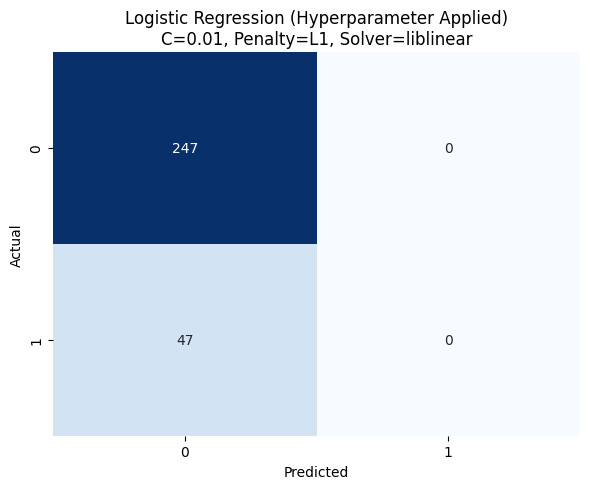

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Predictions from tuned Logistic Regression (best estimator after k-fold CV) ---
y_pred_log = grid_lr.best_estimator_.predict(X_test)

# --- Confusion Matrix ---
cm_log = confusion_matrix(y_test, y_pred_log)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6,5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title(
    f"Logistic Regression (Hyperparameter Applied)\n"
    f"C={grid_lr.best_params_['log_reg__C']}, "
    f"Penalty={grid_lr.best_params_['log_reg__penalty'].upper()}, "
    f"Solver={grid_lr.best_params_['log_reg__solver']}"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [ ]:
#Random Forest – Learning Rate & Tree Depth

param_grid_rf = {# grid parameter for Random Forest
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=cv, scoring='f1')
grid_rf.fit(X_train, y_train)

print(" Random Forest Params:", grid_rf.best_params_)
print(" Random Forest CV score:", grid_rf.best_score_)


 Random Forest Params: {'rf__max_depth': None, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
 Random Forest CV score: 0.2780547108953745


2-Confusion Matrix On Model performances Comparison(Hyperparameters Applied)

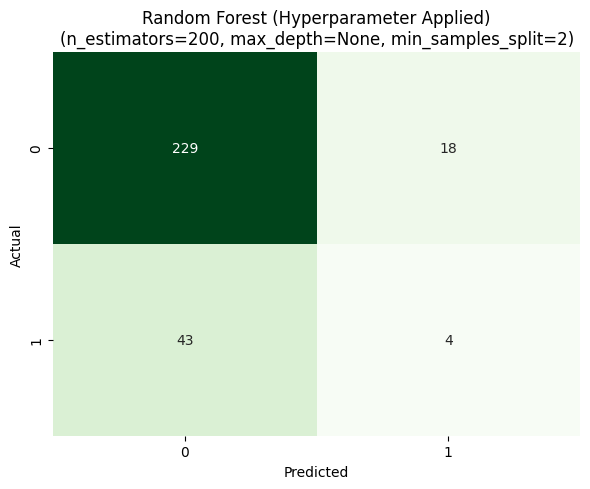

In [61]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Predictions from tuned Random Forest ---
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# --- Confusion Matrix ---
cm_rf = confusion_matrix(y_test, y_pred_rf)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title(
    f"Random Forest (Hyperparameter Applied)\n"
    f"(n_estimators={grid_rf.best_params_['rf__n_estimators']}, "
    f"max_depth={grid_rf.best_params_['rf__max_depth']}, "
    f"min_samples_split={grid_rf.best_params_['rf__min_samples_split']})"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
